<a href="https://colab.research.google.com/github/vicentbas/ia3_uv/blob/main/Read_Hunger_games_RF_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise The Hunger Data Games**

Teacher: Cuadra Alconero, Javier
Group: Roblox Team

Students:

Aparicio, Jose Javier
Ayllón Samaniego, Miguel Angel
Bas Abad, Vicente Jesús

Score: 1.0
Accuracy: 0.7384615384615385
F1_micro: 0.8135593220338984


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


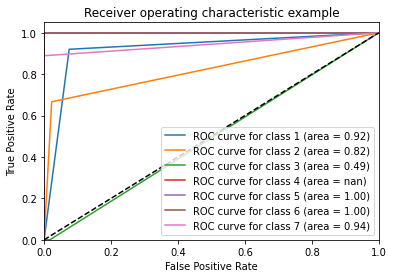

In [1]:
import numpy as np
import pandas as pd
import pickle
import joblib
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score, auc


np.random.seed(123)
url = "glass.csv"
dataframe = pd.read_csv(url)

dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

x = dataframe

dataframe.dropna(inplace=True)

X = dataframe.drop("type_of_glass",1)   #Feature Matrix
y = dataframe["type_of_glass"]          #Target Variable

X.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron"]

classes=[1, 2, 3 ,4, 5 ,6 ,7]
y = label_binarize(y, classes)
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Importamos nuestro modelo
with open('pickle_model.pkl', 'rb') as file:
    pickle_model = pickle.load(file)

y_score = pickle_model.predict(X_test)

print(f"Score: {pickle_model.score(X_train, y_train)}")
print("Accuracy:",metrics.accuracy_score(y_test, y_score))
print(f"F1_micro: {metrics.f1_score(y_test, y_score, average='micro')}")

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], label='ROC curve for class %d (area = %0.2f)' % (i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

